Processing Litecoin for the last 1 days...


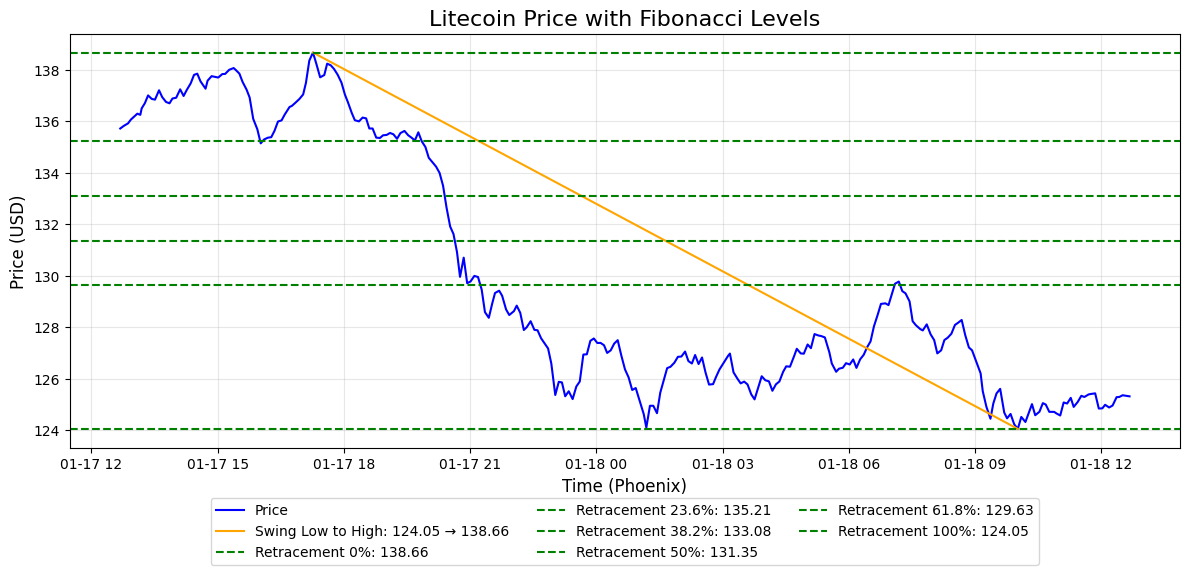

Processing Bitcoin for the last 1 days...


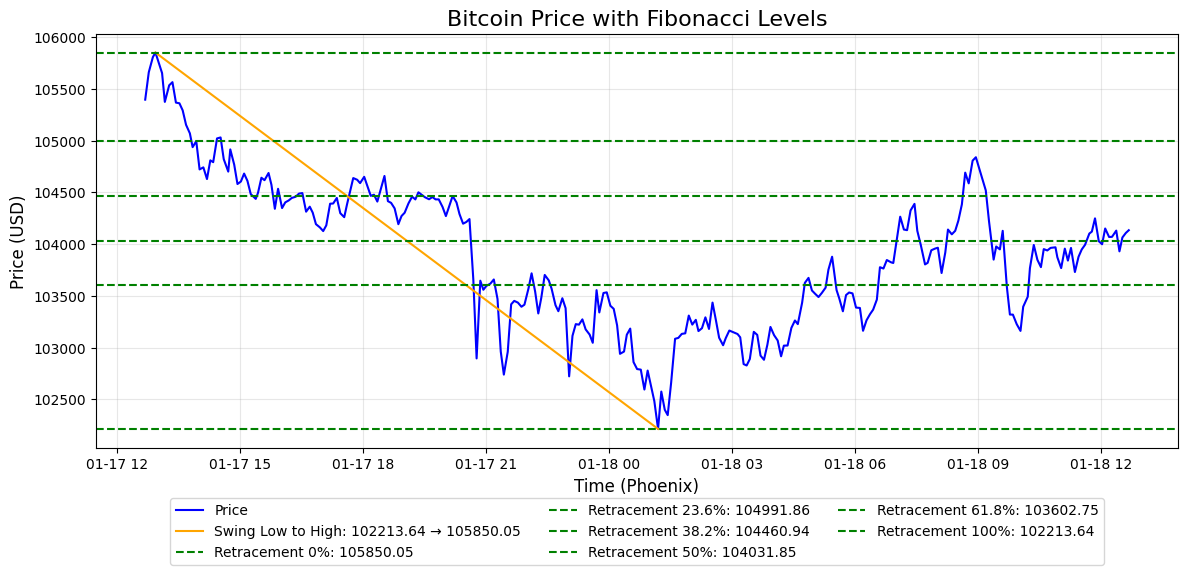

Processing Zilliqa for the last 1 days...


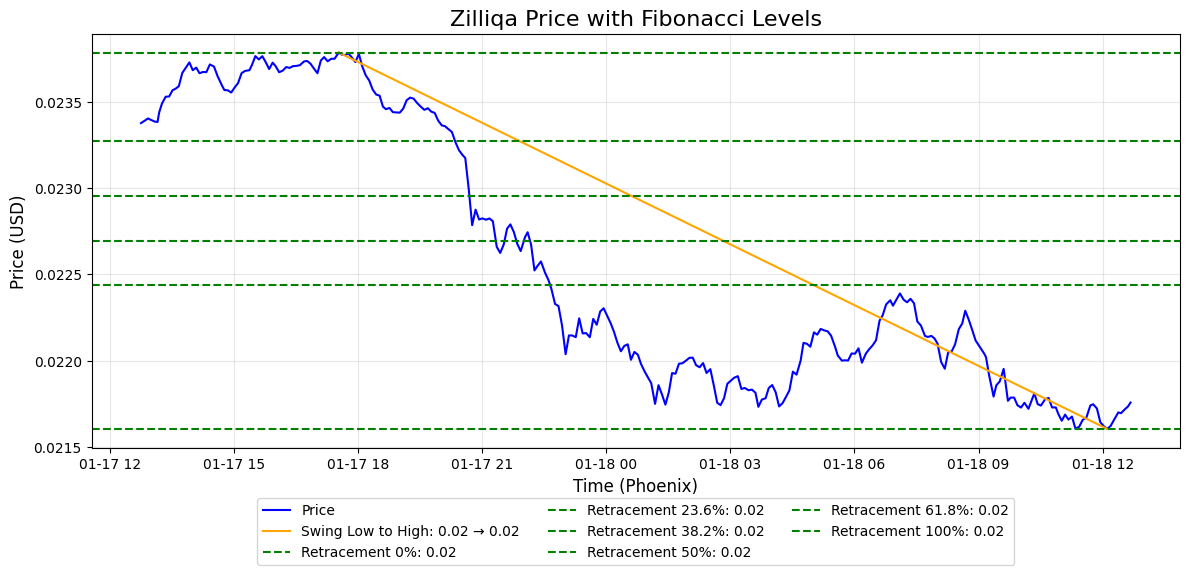

Processing Stellar Lumens for the last 1 days...


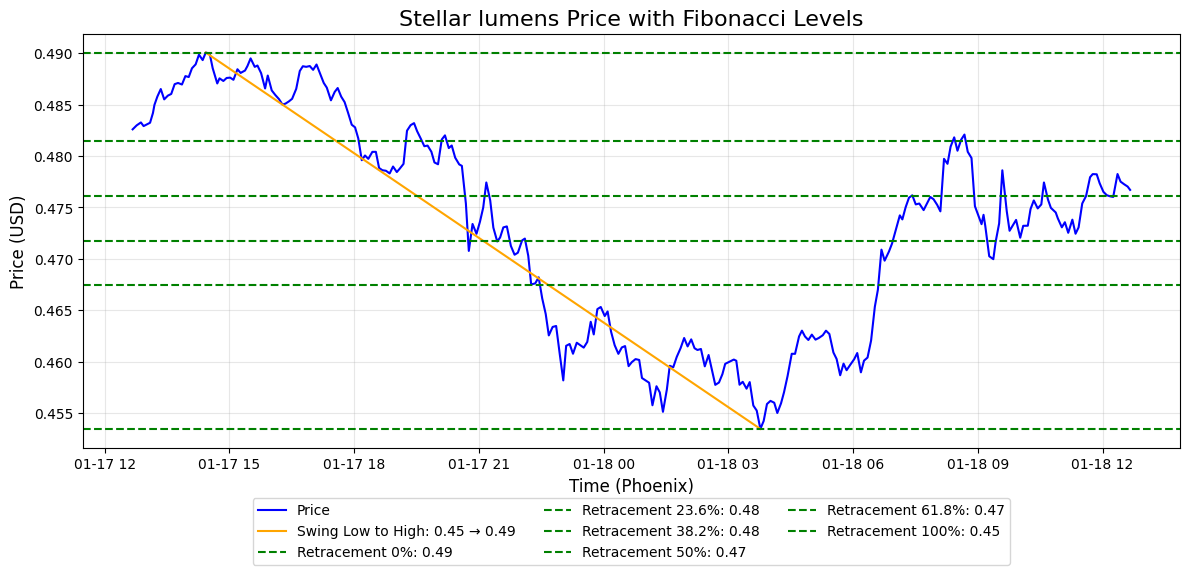

Processing Cardano for the last 1 days...


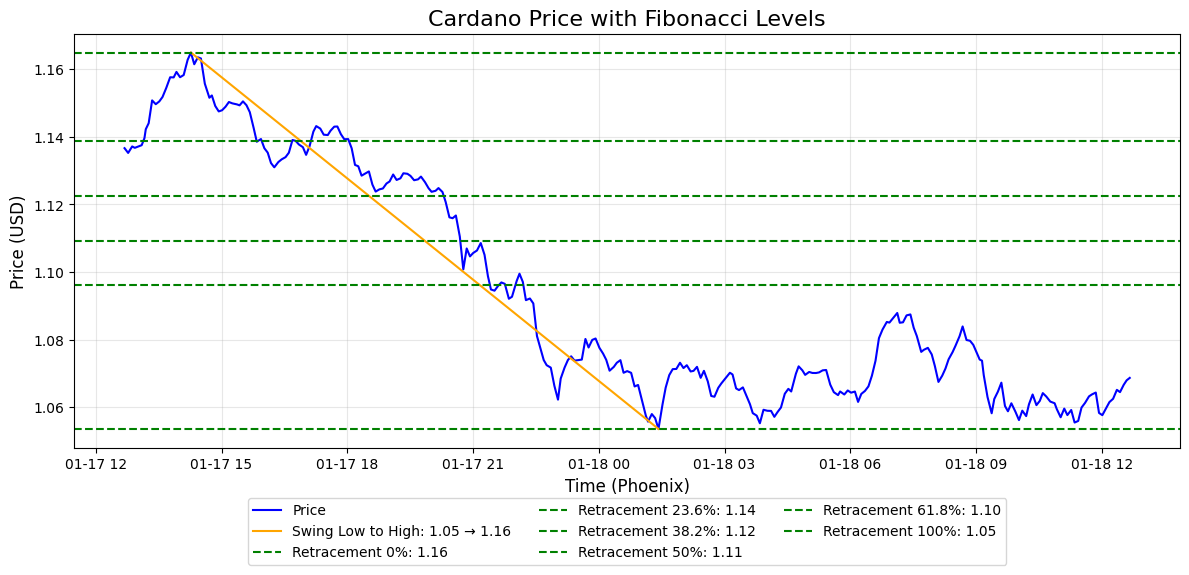

Processing Dogecoin for the last 1 days...
Failed to fetch data for dogecoin.
No valid data for Dogecoin.


In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pytz import timezone

# Function to fetch historical data from CoinGecko
def fetch_coin_data(coin_id, vs_currency, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart?vs_currency={vs_currency}&days={days}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch data for {coin_id}.")
        return None
    data = response.json()
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")  # Convert to datetime
    phoenix_tz = timezone("US/Arizona")  # Define Phoenix timezone
    df["timestamp"] = df["timestamp"].dt.tz_localize("UTC").dt.tz_convert(phoenix_tz)  # Convert to Phoenix time
    return df

# Function to calculate Fibonacci retracement levels
def calculate_fibonacci_levels(swing_high, swing_low):
    diff = swing_high - swing_low
    retracements = {
        "0%": swing_high,
        "23.6%": swing_high - 0.236 * diff,
        "38.2%": swing_high - 0.382 * diff,
        "50%": swing_high - 0.5 * diff,
        "61.8%": swing_high - 0.618 * diff,
        "100%": swing_low,
    }
    return retracements

# Function to plot Fibonacci levels
def plot_fibonacci_levels(coin_id, data, retracements, swing_low, swing_high, swing_low_time, swing_high_time):
    plt.figure(figsize=(12, 6))
    plt.plot(data["timestamp"], data["price"], label="Price", color="blue")

    # Draw a line connecting swing low and swing high
    plt.plot(
        [swing_low_time, swing_high_time],
        [swing_low, swing_high],
        linestyle="-",
        color="orange",
        label=f"Swing Low to High: {swing_low:.2f} → {swing_high:.2f}",
    )

    # Plot Fibonacci retracement levels
    for level, price in retracements.items():
        plt.axhline(price, linestyle="--", color="green", label=f"Retracement {level}: {price:.2f}")
    
    # Add chart details
    plt.title(f"{coin_id.capitalize()} Price with Fibonacci Levels", fontsize=16)
    plt.xlabel("Time (Phoenix)", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), fontsize=10, ncol=3)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"{coin_id}_fibonacci_chart.png")
    plt.show()

# List of cryptocurrencies
cryptos = [
    {"id": "litecoin", "name": "Litecoin"},
    {"id": "bitcoin", "name": "Bitcoin"},
    {"id": "zilliqa", "name": "Zilliqa"},
    {"id": "stellar", "name": "Stellar Lumens"},
    {"id": "cardano", "name": "Cardano"},
    {"id": "dogecoin", "name": "Dogecoin"},
]

# Input: Number of days
try:
    days = int(input("Enter the number of days for historical data: "))
    if days <= 0:
        raise ValueError("The number of days must be a positive integer.")
except ValueError as e:
    print(f"Invalid input: {e}. Defaulting to 30 days.")
    days = 30

# Loop through each cryptocurrency
for crypto in cryptos:
    coin_id = crypto["id"]
    name = crypto["name"]
    
    # Fetch data
    print(f"Processing {name} for the last {days} days...")
    data = fetch_coin_data(coin_id, vs_currency="usd", days=days)
    
    if data is not None and not data.empty:
        # Find swing high and low with corresponding timestamps
        swing_high = data["price"].max()
        swing_low = data["price"].min()
        swing_high_time = data.loc[data["price"] == swing_high, "timestamp"].iloc[0]
        swing_low_time = data.loc[data["price"] == swing_low, "timestamp"].iloc[0]
        
        # Calculate Fibonacci levels
        retracements = calculate_fibonacci_levels(swing_high, swing_low)
        
        # Plot Fibonacci levels
        plot_fibonacci_levels(name, data, retracements, swing_low, swing_high, swing_low_time, swing_high_time)
    else:
        print(f"No valid data for {name}.")
